---
# **1.Installations**
---

In [ ]:
!pip install nltk
!pip install --upgrade git+https://github.com/flairNLP/flair.git
!pip install textblob
!pip install stanza
!pip install spacy
!pip install tqdm

  Cloning https://github.com/flairNLP/flair.git to /tmp/pip-req-build-ctpymjbh
  Running command git clone -q https://github.com/flairNLP/flair.git /tmp/pip-req-build-ctpymjbh
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 798kB 13.8MB/s 
     |████████████████████████████████| 1.1MB 28.2MB/s 
     |████████████████████████████████| 276kB 66.6MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
     |████████████████████████████████| 1.1MB 64.0MB/s 
     |████████████████████████████████| 19.7MB 160kB/s 
     |████████████████████████████████| 983kB 69.9MB/s 
     |████████████████████████████████| 3.0MB 56.8MB/s 
     |████████████████████████████████| 890kB 51.5MB/s 
  Created wheel for flair: filename=flair-0.6.1-cp36-none-any.whl size=201257 sha256=61b4a925b0f6c82c48184a9c421882e0184b4b0d8f485b680362fb03ecf5f1aa
  Stored in directory: /tmp/pip-ephem-wheel-c

---
# **2. Imports**
---

In [ ]:
import re
import logging
import requests
import io
import pandas as pd
pd.options.mode.chained_assignment = None # default='warn'

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import sleep

In [ ]:
from textblob import TextBlob

In [ ]:
import flair
flair_sent = flair.models.TextClassifier.load('en-sentiment')

2020-10-03 01:15:31,577 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_3.1.pt not found in cache, downloading to /tmp/tmpd7ns_uwt


100%|██████████| 266147697/266147697 [00:06<00:00, 38888250.80B/s]

2020-10-03 01:15:38,484 copying /tmp/tmpd7ns_uwt to cache at /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


2020-10-03 01:15:39,302 removing temp file /tmp/tmpd7ns_uwt
2020-10-03 01:15:44,313 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

SIA = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
import stanza
stanza.download('en', package='ewt', processors='tokenize,sentiment,pos', verbose=True)
stanza.download('en', package='default', processors='tokenize,sentiment', verbose=True)
stNLP = stanza.Pipeline(processors='tokenize,sentiment,pos', lang='en', use_gpu=True)

2020-10-03 01:16:02 WARNING: Can not find sentiment: ewt from official model list. Ignoring it.
2020-10-03 01:16:02 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| pos       | ewt     |
| pretrain  | ewt     |

2020-10-03 01:16:47 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-10-03 01:16:47 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| sentiment | sstplus |
| pretrain  | ewt     |

2020-10-03 01:16:47 INFO: File exists: /root/stanza_resources/en/tokenize/ewt.pt.
2020-10-03 01:16:54 INFO: File exists: /root/stanza_resources/en/pretrain/ewt.pt.
2020-10-03 01:16:54 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-10-03 01:16:54 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tok

In [ ]:
import spacy
spNLP = spacy.load("en_core_web_sm")

---
# **3. NLP functions**
---

In [ ]:
def text_blob_subjective(text):
    return TextBlob(text).sentiment

def flair_lstm(text):
    x = flair.data.Sentence(text)
    flair_sent.predict(sentences=x)
    return x.labels

def stanza_funct(text):
    try:
        data = stNLP(text)
        for sentence in data.sentences:
            return sentence.sentiment
    except:
        print('{...}', end='; ')

## PLOT functions (simple & bar)

In [ ]:
def simple_plot(x, y, size):
    plt.figure(figsize=size)
    plt.plot(x, y, linestyle='solid', color='red')
    plt.xlabel('labels')
    plt.ylabel('scores')
    plt.legend(loc='upper left')
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(b=True)
    
    plt.show()

def simple_bar(x, y, size):
    plt.figure(figsize=size)
    plt.bar(x, y, linestyle='solid', color='red')
    plt.xlabel('labels')
    plt.ylabel('scores')
    plt.legend(loc='upper left')
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(b=True)

    plt.show()

---
# **4. Preprocessing**
---

## **Loading datasets**

In [ ]:
def download_datasets():
    !mkdir -p datasets
    # twitter
    !wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/sentiment-analysis-is-bad/data/training.1600000.processed.noemoticon.csv.zip -P datasets
    !unzip -n -d datasets datasets/training.1600000.processed.noemoticon.csv.zip
    !rm datasets/training.1600000.processed.noemoticon.csv.zip
    
    # emobank
    !wget -nc https://raw.githubusercontent.com/Y4rd13/sentiment-analysis/master/datasets/emobank.csv -P datasets
    # isear
    !wget -nc https://raw.githubusercontent.com/Y4rd13/sentiment-analysis/master/datasets/isear.csv -P datasets

In [ ]:
download_datasets()

--2020-10-03 01:17:00--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/sentiment-analysis-is-bad/data/training.1600000.processed.noemoticon.csv.zip
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85088192 (81M) [application/zip]
Saving to: ‘datasets/training.1600000.processed.noemoticon.csv.zip’

training.1600000.pr 100%[===================>]  81.15M  30.0MB/s    in 2.7s    

2020-10-03 01:17:03 (30.0 MB/s) - ‘datasets/training.1600000.processed.noemoticon.csv.zip’ saved [85088192/85088192]

Archive:  datasets/training.1600000.processed.noemoticon.csv.zip
  inflating: datasets/training.1600000.processed.noemoticon.csv  
--2020-10-03 01:17:06--  https://raw.githubusercontent.com/Y4rd13/sentiment-analysis/master/datasets/emobank.csv
Resolving raw.githubusercontent.com (raw.githubuserco

## **Reading datasets**

In [ ]:
twitter = pd.read_csv('/content/datasets/training.1600000.processed.noemoticon.csv', encoding='latin-1',
                      names=['polarity', 'id', 'date', 'query', 'user', 'text'], usecols=['polarity', 'text'])

In [ ]:
# replace polarity
twitter.polarity = twitter.polarity.replace({0: 'negative', 4: 'positive'})

In [ ]:
emobank = pd.read_csv('/content/datasets/emobank.csv', encoding='utf-8', sep=',', usecols=['split', 'text', 'V', 'A', 'D'])

In [ ]:
isear = pd.read_csv('/content/datasets/isear.csv', encoding='utf-8', sep='|', error_bad_lines=False, usecols=['SIT', 'Field1'])

In [ ]:
twitter.columns = ['category', 'text']
isear.columns = ['category', 'text']

## **Concatenating and fill NaN**

In [ ]:
df_concat = pd.concat(objs=[twitter, emobank, isear], ignore_index=False)

In [ ]:
# checking for nan values & filling them with 0
check_nan = [i for i in (df_concat.isnull().any()) if i == True]
try:
    check_nan.index(True)
    df_concat.fillna(value=0, inplace=True)
except:
    print('No NaN values found')

---
# **5. Preprocessing**
---

In [ ]:
def preprocess_dataset(input_csv, output_name):
    # loading
    unclean_df = input_csv

    # lower case
    unclean_df['text'] = unclean_df['text'].str.lower()

    # removing urls
    unclean_df['text'] = unclean_df['text'].apply(lambda x: re.sub(r'https://www\.|http:\.|https://|www\.', '', x))
    unclean_df['text'] = unclean_df['text'].apply(lambda x: re.sub(r'[\S]+\.(net|com|org|info|edu|gov|uk|de|ca|jp|fr|au|us|ru|ch|it|nel|se|no|es|mil|cl)[\S]*\s?', '', x))

    # remove special character and numbers
    unclean_df['text'] = unclean_df['text'].apply(lambda x: re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-zÁ-Úá-ú \t])|(\w+:\/\/\S+)|^rt|http.+?%', '', x))
    unclean_df['text'] = unclean_df['text'].apply(lambda x: re.sub(r'\d+', '', x))

    # remove repetitions (goood ==> good ==> god?; whaaat ==> what)
    #pattern = re.compile(r'(.)\1{2,}', re.DOTALL)
    #unclean_df['text'] = unclean_df['text'].str.replace(pattern, r'\1')

    # removing empty values
    nan_value = float('NaN')
    unclean_df.replace('', nan_value, inplace=True)
    unclean_df.replace(' ', nan_value, inplace=True)
    unclean_df.dropna(inplace=True)
    
    # Strip spaces both sides
    unclean_df['text'] = unclean_df['text'].str.strip()

    # removing stopwords
    #df['text'] = df['text'].apply(lambda x: ' '.join([i for i in x.split() if i not in (STOPWORDS)]))

    # filtering and removing non-english words or misspelling
    #df['text'] = df['text'].apply(lambda x: ' '.join([i for i in x.split() if i.lower() in NLTK_WORDS or not i.isalpha()]))

    # rewritting the created file without NaN values
    !mkdir preprocessed
    unclean_df.to_csv('preprocessed/' + output_name, quotechar='"', encoding='utf-8', index=False)


    # returning clean csv
    df = pd.read_csv('preprocessed/' + output_name, encoding='utf-8', warn_bad_lines=True).dropna()

    # checking for nan values & filling them with 0
    check_nan = [i for i in (df.isnull().any()) if i == True]
    try:
        check_nan.index(True)
        df.fillna(value=0, inplace=True)
    except:
        print('No NaN values found')
  
    return df

In [ ]:
df = preprocess_dataset(input_csv=df_concat, output_name='df_preprocessed')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


No NaN values found


In [ ]:
df

,category,text,split,V,A,D
0,negative,awww thats a bummer you shoulda got david car...,0,0.0,0.0,0.0
1,negative,is upset that he cant update his facebook by t...,0,0.0,0.0,0.0
2,negative,i dived many times for the ball managed to sav...,0,0.0,0.0,0.0
3,negative,my whole body feels itchy and like its on fire,0,0.0,0.0,0.0
4,negative,no its not behaving at all im mad why am i her...,0,0.0,0.0,0.0
...,...,...,...,...,...,...
1615362,anger,two years back someone invited me to be the tu...,0,0.0,0.0,0.0
1615363,sadness,i had taken the responsibility to do something...,0,0.0,0.0,0.0
1615364,disgust,i was at home and i heard a loud sound of spit...,0,0.0,0.0,0.0
1615365,shame,i did not do the homework that the teacher had...,0,0.0,0.0,0.0


## **Dataset group by column value**



In [ ]:
group = df.groupby(df.category)

In [ ]:
np.array(set(df.category))

array({'fear', 'negative', 'disgust', 'joy', 'sadness', 'positive', '0', 'guilt', 'anger', 'shame'},
      dtype=object)

In [ ]:
positive = group.get_group('positive')
negative = group.get_group('negative')
anger = group.get_group('anger')
disgust = group.get_group('disgust')
fear = group.get_group('fear')
guilt = group.get_group('guilt')
joy = group.get_group('joy')
sadness = group.get_group('sadness')
shame = group.get_group('shame')

In [ ]:
positive

,category,text,split,V,A,D
798738,positive,i love u guys r the best,0,0.0,0.0,0.0
798739,positive,im meeting up with one of my besties tonight c...,0,0.0,0.0,0.0
798740,positive,thanks for the twitter add sunisa i got to mee...,0,0.0,0.0,0.0
798741,positive,being sick can be really cheap when it hurts t...,0,0.0,0.0,0.0
798742,positive,he has that effect on everyone,0,0.0,0.0,0.0
...,...,...,...,...,...,...
1597645,positive,just woke up having no school is the best feel...,0,0.0,0.0,0.0
1597646,positive,very cool to hear old walt interviews â,0,0.0,0.0,0.0
1597647,positive,are you ready for your mojo makeover ask me fo...,0,0.0,0.0,0.0
1597648,positive,happy th birthday to my boo of alll time tupac...,0,0.0,0.0,0.0


---
# **6. NLP applying**
---

In [ ]:
def drop_empty_string(df):
    # Warning: An empty Sentence was created!
    # Are there empty strings in your dataset?
    print('\nremoving empty values...\n')
    nan_value = float('NaN')
    df.replace('', nan_value, inplace=True)
    df.replace(' ', nan_value, inplace=True)
    df.replace('  ', nan_value, inplace=True)
    df.dropna(inplace=True)

    return df

In [ ]:
def nlp_apply(df, c):
    print('Vader\n')
    #df['Compound'] = df[c].apply(lambda x: SIA.polarity_scores(text=x)['compound'])
    
    print('TextBlob')
    #df['Subjectivity'] = df[c].apply(lambda x: text_blob_subjective(text=x)[1])
    
    df = drop_empty_string(df)

    print('Stanza')
    df['Stanza'] = df[c].apply(lambda x: stanza_funct(text=x))

    df = drop_empty_string(df)

    print('Flair\n')
    df['Flair'] = df[c].apply(lambda x: ''.join([i.value for i in flair_lstm(text=x)]))

    return df

In [ ]:
df = nlp_apply(df, c='text')

Vader

TextBlob

removing empty values...

Stanza
{...}; {...}; {...}; {...}; {...}; {...}; 

---
# **7. Quadrants**
---

## **Midpoint**

In [ ]:
def min_max_value(df, c):
    return df[c].min(), df[c].max()

In [ ]:
def midpoint(df, c):
    '''Compute medium point from dataframe'''
    x1, x2 = min_max_value(df, c)
    return x2 - x1 / 2

In [ ]:
def midpoint_general(lst_min, lst_max):
    return (max(lst_max) - min(lst_min)) / 2 

In [ ]:
# COLUMNS: word, Arousal, Valence, Dominance
arousal_mp = midpoint(df, 'A')
valence_mp = midpoint(df, 'V')
dominance_mp = midpoint(df, 'D')

In [ ]:
# MIN AND MAX
arousal_min, arousal_max = min_max_value(df, 'A')
valence_min, valence_max = min_max_value(df, 'V')
dominance_min, dominance_max = min_max_value(df, 'D')

In [ ]:
midpoint = midpoint_general(
                            lst_min = [arousal_min, valence_min, dominance_min],
                            lst_max = [arousal_max, valence_max, dominance_max]
                            )

In [ ]:
midpoint

2.3

In [ ]:
def drop_category(df, s):
    return df.drop(first_quad[first_quad['category'] == s].index)

In [ ]:
negative_valance = ['negative', 'anger', 'disgust', 'fear', 'sadness', 'shame']
positive_valance = ['positive', 'joy']

### **I. High Arousal, Positive Valence**

In [ ]:
first_quad = df[(df['A'] >= midpoint) & (df['V'] >= midpoint)]

In [ ]:
for i in negative_valance:
    first_quad = drop_category(first_quad, i)

In [ ]:
first_quad['quadrant'] = 1

### **II. High Arousal, Negative Valance**

In [ ]:
second_quad = df[(df['A'] >= midpoint) & (df['V'] <= midpoint)]

In [ ]:
for i in positive_valance:
    second_quad = drop_category(second_quad, i)

In [ ]:
second_quad['quadrant'] = 2

### **III. Low Arousal, Negative Valance**

In [ ]:
third_quad = df[(df['A'] <= midpoint) & (df['V'] <= midpoint)]

In [ ]:
for i in positive_valance:
    third_quad = drop_category(third_quad, i)

In [ ]:
third_quad['quadrant'] = 3

### **IV. Low Arousal, Positive Valance**

In [ ]:
fourth_quad = df[(df['A'] <= midpoint) & (df['V'] >= midpoint)]

In [ ]:
for i in negative_valance:
    fourth_quad = drop_category(fourth_quad, i)

In [ ]:
fourth_quad['quadrant'] = 4

### **Plot quadrants**

No handles with labels found to put in legend.


[9640, 500, 1604714, 19]


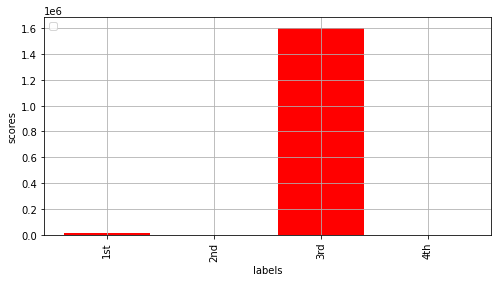

In [ ]:
y_quad = list(map(len, [first_quad, second_quad, third_quad, fourth_quad]))
print(y_quad)

simple_bar(x=['1st', '2nd', '3rd', '4th'], y=y_quad, size=(8, 4))

In [ ]:
def check_check(df, c):
    return np.array(sorted(list(set(df[c]))))

---
# **8. Categories**
---

In [ ]:
def concat(lst):
    return pd.concat(objs=lst, ignore_index=True)

## Confident
* confident --> trust
* unconfident --> disgust

In [ ]:
disgust

,category,text,split,V,A,D
1607705,disgust,the time i knocked a deer down the sight of t...,0,0.0,0.0,0.0
1607712,disgust,when i saw all the very drunk kids years old ...,0,0.0,0.0,0.0
1607719,disgust,at a gathering i found myself involuntarily si...,0,0.0,0.0,0.0
1607726,disgust,when i found a bristle in the liver paste tube,0,0.0,0.0,0.0
1607733,disgust,when one finds out that someone you know is no...,0,0.0,0.0,0.0
...,...,...,...,...,...,...
1615336,disgust,the curriculum of the year the english cour...,0,0.0,0.0,0.0
1615343,disgust,a man sexually aggressed a small girl in the b...,0,0.0,0.0,0.0
1615350,disgust,at hostel my roommate was a very selfish perso...,0,0.0,0.0,0.0
1615357,disgust,my roommate liked to listen to some meaningles...,0,0.0,0.0,0.0


### Handles pressure
In the positive side is included patience, focus and calm
- POS : dominance strong + low arousal + positive valence
- NEG : dominance weak + high arousal + negative valence

### Organized
- POS : anticipation + high arousal + positive valence   
- NEG : surprise + low arousal + negative valence

### Interested
- POS : [anticipation] + high arousal + positive valence
- NEG : [surprise] + low arousal + negative valence

### Happy
- POS : joy + high arousal + positive valence
- NEG : sadness + low arousal + negative valence

### Friendly
- POS : high arousal + positive valence + (positive) + (joy + trust)
- NEG : anger + high arousal + negative valence

,category,text,split,V,A,D
1607701,joy,during the period of falling in love each time...,0,0.0,0.0,0.0
1607708,joy,when i got a letter offering me the summer job...,0,0.0,0.0,0.0
1607715,joy,on days when i feel close to my partner and ot...,0,0.0,0.0,0.0
1607722,joy,after my girlfriend had taken her exam we went...,0,0.0,0.0,0.0
1607729,joy,when i pass an examination which i did not thi...,0,0.0,0.0,0.0
...,...,...,...,...,...,...
1615332,joy,when i received a letter from the university t...,0,0.0,0.0,0.0
1615339,joy,i had a picnic with old classmates we chatted ...,0,0.0,0.0,0.0
1615346,joy,it was the first time that i gave a birthday p...,0,0.0,0.0,0.0
1615353,joy,in august the long awaited big envelope a docu...,0,0.0,0.0,0.0


## Concatenating categories

## Plot categories